# Pandas

Numpy omogućava brz i lagan rad s doista homogenim skupinama podataka pravokutnog oblika u proizvoljnom broju dimenzija, ali često nam u stvarnom životu treba nešto malo drugačije. Obično radimo s *tablicama* (isključivo dvodimenzionalnim) podataka, čiji *stupci* jesu homogeni (u jednom stupcu su svi podaci istog tipa), ali međusobno nisu (dva stupca u istoj tablici mogu sadržavati podatke različitih tipova).

Također, tablica može imati nekakvo zaglavlje koje možemo shvatiti kao da stupci imaju *imena* pomoću kojih ih možemo dohvaćati iz tablice --- a obično ima i nekakvu metodu dohvaćanja podataka iz pojedinog retka, što možemo shvatiti kao da ima još jedan "stupac" zvan *indeks*, koji je zajednički svim stupcima u istoj tablici i time ih povezuje.

`pandas` u tu svrhu uvodi dvije klase:
* `Series` predstavlja imenovani i indeksirani stupac, odnosno neki spremnik podataka istog tipa koje možemo dohvatiti pomoću ključeva iz indeksa.
* `DataFrame` je skupina `Series`a, koje imaju različita imena i isti (zajednički) indeks.

In [1]:
import pandas as pd
from datetime import datetime as dt
(df := pd.DataFrame([[1, 9, 2.6, 'riječ', 2+3j, dt(2020, 3, 22), True ], 
                     [3, 5, 4.7, 'nešto',   1j, dt(2020, 3, 20), False]],
       columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'], index=['jedan', 'dva']))

,a,b,c,d,e,f,g
jedan,1,9,2.6,riječ,2.0+3.0j,2020-03-22,True
dva,3,5,4.7,nešto,0.0+1.0j,2020-03-20,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, jedan to dva
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   a       2 non-null      int64         
 1   b       2 non-null      int64         
 2   c       2 non-null      float64       
 3   d       2 non-null      object        
 4   e       2 non-null      complex128    
 5   f       2 non-null      datetime64[ns]
 6   g       2 non-null      bool          
dtypes: bool(1), complex128(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 130.0+ bytes


### Dohvaćanje podataka

**Priprema:** Na https://www.hnb.hr/temeljne-funkcije/monetarna-politika/tecajna-lista/tecajna-lista kliknuti Pretraživanje, i odabrati:
* Mjesečni prosjeci
* Sve godine
* Svi mjeseci
* Sve (valute)
* Svi tečajevi
* JSON

te kliknuti "Preuzimanje". Datoteku raspakirati u tekući direktorij kao `ProsjeciMjesecni_2011-2022.json`.

Naravno, rijetko ćemo konstruirati `DataFrame` direktno u bilježnici kao što smo učinili gore. Puno češće (kao ovdje) podaci dolaze iz nekog vanjskog izvora. Pogledajmo koje funkcije `pandas` nudi za učitavanje podataka.

In [3]:
{metoda for metoda in dir(pd) if metoda.startswith('read_')}

{'read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml'}

In [4]:
tečaj = pd.read_json('ProsjeciMjesecni_2011-2022.json', encoding='utf-8')
tečaj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Godina              1927 non-null   int64 
 1   Mjesec              1927 non-null   object
 2   Država              1927 non-null   object
 3   Šifra valute        1927 non-null   int64 
 4   Valuta              1927 non-null   object
 5   Jedinica            1927 non-null   int64 
 6   Kupovni za devize   1927 non-null   object
 7   Srednji za devize   1927 non-null   object
 8   Prodajni za devize  1927 non-null   object
dtypes: int64(3), object(6)
memory usage: 135.6+ KB


In [5]:
tečaj.head()

,Godina,Mjesec,Država,Šifra valute,Valuta,Jedinica,Kupovni za devize,Srednji za devize,Prodajni za devize
0,2011,Siječanj,Australija,36,AUD,1,"5,504948","5,521513","5,538077"
1,2011,Siječanj,Kanada,124,CAD,1,"5,554872","5,571587","5,588302"
2,2011,Siječanj,Češka,203,CZK,1,"0,301385","0,302292","0,303199"
3,2011,Siječanj,Danska,208,DKK,1,"0,989672","0,992650","0,995628"
4,2011,Siječanj,Mađarska,348,HUF,100,"2,676801","2,684856","2,692910"


Vidimo listu stupaca. Mnoge od njih mogli bismo ljepše prikazati. Za početak pogledajmo stupac 'Mjesec'.

Primijetimo da se `DataFrame` ponaša kao obični prostor imena, koji sadrži stupce i dohvaća ih po imenima.

### Sređivanje datumâ

In [6]:
tečaj['Mjesec']

0       Siječanj
1       Siječanj
2       Siječanj
3       Siječanj
4       Siječanj
          ...   
1922     Veljača
1923     Veljača
1924     Veljača
1925     Veljača
1926     Veljača
Name: Mjesec, Length: 1927, dtype: object

Dobili smo `Series`: vidimo da ima ime, `dtype` (kao Numpyjev vektor), a indeksiran je indeksom čitavog `DataFrame`a. U nedostatku pametnije ideje, Pandas retke indeksira s `range(broj_redaka)`, odnosno prirodnim brojevima počevši od 0.

In [7]:
(hr_mjeseci := set(tečaj['Mjesec']))

{'Kolovoz',
 'Lipanj',
 'Listopad',
 'Ožujak',
 'Prosinac',
 'Rujan',
 'Siječanj',
 'Srpanj',
 'Studeni',
 'Svibanj',
 'Travanj',
 'Veljača'}

Dakle, imamo hrvatske nazive mjeseci. Ako bismo željeli to pretvoriti u datume, trebat će nam broj mjeseca. Python [zna](https://docs.python.org/3/library/calendar.html#calendar.month_name) hrvatske nazive za mjesece, samo trebamo prethodno [locale](https://en.wikipedia.org/wiki/Locale_(computer_software%29) podesiti na hrvatski. Nažalost, to se razlikuje ovisno o operacijskom sustavu. Nakon toga izgradimo rječnik koji preslikava nazive mjeseci u njihove redne brojeve.

In [8]:
import platform
OS = platform.system()
print(f'{OS=}')
hrvatski = dict(Windows='Croatian_Croatia',
                  Linux='hr_HR.UTF8', 
                 Darwin='hr_HR.UTF-8')[OS]

OS='Windows'


In [9]:
import calendar
with calendar.different_locale(hrvatski):
    imena_mj = [ime_mjeseca.title() for ime_mjeseca in calendar.month_name]
imena_mj

['',
 'Siječanj',
 'Veljača',
 'Ožujak',
 'Travanj',
 'Svibanj',
 'Lipanj',
 'Srpanj',
 'Kolovoz',
 'Rujan',
 'Listopad',
 'Studeni',
 'Prosinac']

Ako gornja ćelija prijavi poruku o grešci, samo prekopirajte izlaz donje ćelije (rječnik) u ulaz nakon `mjesec_broj = `. Tako ćete hardkodirati hrvatske nazive mjeseci za kasniju upotrebu.

In [10]:
(mjesec_broj := {hr_mjesec: imena_mj.index(hr_mjesec) for hr_mjesec in hr_mjeseci})

{'Travanj': 4,
 'Srpanj': 7,
 'Rujan': 9,
 'Prosinac': 12,
 'Siječanj': 1,
 'Kolovoz': 8,
 'Studeni': 11,
 'Listopad': 10,
 'Lipanj': 6,
 'Veljača': 2,
 'Ožujak': 3,
 'Svibanj': 5}

Sada možemo zamijeniti sve vrijednosti u stupcu `Mjesec` koristeći rječnik `mjesec_broj`. Parametar `inplace` služi tome da se zamjena obavi na licu mjesta, unutar samog dataframea `tečaj` (umjesto vraćanja novog dataframea).

In [11]:
tečaj.replace({'Mjesec': mjesec_broj}, inplace=True)
tečaj.head(3)

,Godina,Mjesec,Država,Šifra valute,Valuta,Jedinica,Kupovni za devize,Srednji za devize,Prodajni za devize
0,2011,1,Australija,36,AUD,1,"5,504948","5,521513","5,538077"
1,2011,1,Kanada,124,CAD,1,"5,554872","5,571587","5,588302"
2,2011,1,Češka,203,CZK,1,"0,301385","0,302292","0,303199"


Sada napokon možemo stvoriti stupac 'Datum' (za dan u mjesecu fiksiramo `1`), te obrisati zasebne stupce za godinu i mjesec koji nam više ne trebaju.

In [12]:
tečaj['Datum'] = pd.to_datetime(dict(year=tečaj['Godina'], month=tečaj['Mjesec'], day=1))
del tečaj['Godina'], tečaj['Mjesec']
tečaj.head(3)

,Država,Šifra valute,Valuta,Jedinica,Kupovni za devize,Srednji za devize,Prodajni za devize,Datum
0,Australija,36,AUD,1,"5,504948","5,521513","5,538077",2011-01-01
1,Kanada,124,CAD,1,"5,554872","5,571587","5,588302",2011-01-01
2,Češka,203,CZK,1,"0,301385","0,302292","0,303199",2011-01-01


Umjesto beskorisnih rednih brojeva, stavimo datum kao indeks kojim možemo dohvaćati podatke.

In [13]:
tečaj.set_index('Datum', inplace=True)
tečaj.head(3)

,Država,Šifra valute,Valuta,Jedinica,Kupovni za devize,Srednji za devize,Prodajni za devize
Datum,,,,,,,
2011-01-01,Australija,36,AUD,1,"5,504948","5,521513","5,538077"
2011-01-01,Kanada,124,CAD,1,"5,554872","5,571587","5,588302"
2011-01-01,Češka,203,CZK,1,"0,301385","0,302292","0,303199"


### Države, valute i šifre

Sada se bacimo na stupce koji se odnose na valutu. Pretpostavljamo da postoji bijekcija (trijekcija?:) između sljedeća 3 stupca:

In [14]:
tečaj[['Država', 'Valuta', 'Šifra valute']].drop_duplicates()

,Država,Valuta,Šifra valute
Datum,,,
2011-01-01,Australija,AUD,36
2011-01-01,Kanada,CAD,124
2011-01-01,Češka,CZK,203
2011-01-01,Danska,DKK,208
2011-01-01,Mađarska,HUF,348
2011-01-01,Japan,JPY,392
2011-01-01,Norveška,NOK,578
2011-01-01,Švedska,SEK,752
2011-01-01,Švicarska,CHF,756


Čini se da je doista tako (u pojedinim stupcima nema duplikata --- što ovdje možemo ustanoviti golim okom, ali kod kompliciranijih podataka, dobro je koristiti metodu `.duplicated`), jedino što [XDR](https://hr.wikipedia.org/wiki/Posebna_prava_vu%C4%8Denja) nema napisanu državu. Kako euro ima EMU, čini se logičnim XDRu staviti MMF. Šifra valute nam svakako više ne treba, jer je u bijekciji s valutom, a nema neku pametnu semantiku ionako.

`df.loc` je također prostor imena, ali po koordinatama "redak, stupac" (slično kao za `numpy.array`). Možemo koristiti razne trikove koje znamo iz Numpyja, kao što su maske (odmah dolje) i broadcastane operacije (niže dolje, kad budemo doista radili nešto s tečajevima kao realnim brojevima).

In [15]:
tečaj.loc[tečaj['Valuta'] == 'XDR', 'Država'] = 'MMF'
del tečaj['Šifra valute']
tečaj[['Država', 'Valuta']].drop_duplicates()

,Država,Valuta
Datum,,
2011-01-01,Australija,AUD
2011-01-01,Kanada,CAD
2011-01-01,Češka,CZK
2011-01-01,Danska,DKK
2011-01-01,Mađarska,HUF
2011-01-01,Japan,JPY
2011-01-01,Norveška,NOK
2011-01-01,Švedska,SEK
2011-01-01,Švicarska,CHF


Državu zasad ostavimo, ljepše izgleda od troslovne skraćenice valute za kasniju vizualizaciju.

### Tečajevi kao brojevi

Nego, pogledajmo tri stupca sa samim tečajevima. 
* Prvo, maknimo podstring ` za devize` s kraja njihovih naziva. 
* Drugo, pretvorimo ih u brojeve --- samo prethodno moramo decimalni zarez zamijeniti decimalnom točkom (to također `locale` može, ali je komplicirano).
* I treće, pretvorimo ove retke što imaju `100` u stupcu `Jedinica`, u retke sa 100 puta manjim tečajevima.

In [16]:
from operator import methodcaller
tečaj.rename(columns=methodcaller('removesuffix', ' za devize'), inplace=True)

for vrsta in 'Kupovni', 'Prodajni', 'Srednji':
    tečaj[vrsta] = pd.to_numeric(tečaj[vrsta].str.replace(',', '.'))
    tečaj[vrsta] /= tečaj['Jedinica']
del tečaj['Jedinica']

tečaj.head()

,Država,Valuta,Kupovni,Srednji,Prodajni
Datum,,,,,
2011-01-01,Australija,AUD,5.504948,5.521513,5.538077
2011-01-01,Kanada,CAD,5.554872,5.571587,5.588302
2011-01-01,Češka,CZK,0.301385,0.302292,0.303199
2011-01-01,Danska,DKK,0.989672,0.992650,0.995628
2011-01-01,Mađarska,HUF,0.026768,0.026849,0.026929


### Srednji tečaj je dovoljan

<AxesSubplot:xlabel='Datum'>

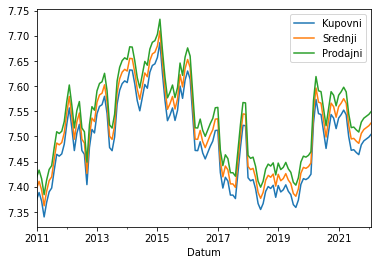

In [17]:
%matplotlib inline
tečaj[tečaj['Valuta'] == 'EUR'].plot()

Iz grafa zaključujemo da su kupovni, srednji i prodajni tečajevi vrlo slični, te nam vjerojatno ne trebaju sva tri podatka (iz bilo kojeg možemo zaključiti ostala dva). Kako XDR nema kupovni i prodajni tečaj, želimo srednji tečaj proglasiti osnovnim, a kupovni i prodajni računati iz njega.

In [18]:
tečaj[tečaj['Valuta'] == 'XDR'].head()

,Država,Valuta,Kupovni,Srednji,Prodajni
Datum,,,,,
2011-01-01,MMF,XDR,NaN,8.575765,NaN
2011-02-01,MMF,XDR,NaN,8.486219,NaN
2011-03-01,MMF,XDR,NaN,8.351255,NaN
2011-04-01,MMF,XDR,NaN,8.158269,NaN
2011-05-01,MMF,XDR,NaN,8.214160,NaN


Prva, relativno očita, hipoteza je da "srednji" tečaj doista znači sredinu, konkretno aritmetičku sredinu.

In [19]:
(tečaj[['Kupovni', 'Prodajni']].mean(axis=1) - tečaj['Srednji']).abs().max()

5.00000002290335e-07

Odstupanje od $5\cdot10^{-7}$ je očito samo posljedica zaokruživanja (jer su tečajevi zaokruženi na 6 decimala).

Ipak, to nije dovoljno da rekonstruiramo i kupovni i prodajni tečaj iz srednjeg --- moramo ustanoviti kolika je razlika. Apsolutna razlika vjerojatno nema smisla, između ostalog jer su neki tečajevi bili dijeljeni sa 100. Pogledajmo relativnu razliku, odnosno omjer.

In [20]:
pd.DataFrame({vrsta: tečaj[vrsta] / tečaj['Srednji']
              for vrsta in ['Kupovni', 'Prodajni']}).describe()

,Kupovni,Prodajni
count,1.793000e+03,1.793000e+03
mean,9.970000e-01,1.003000e+00
std,4.760378e-07,4.695645e-07
min,9.969968e-01,1.002997e+00
25%,9.969999e-01,1.003000e+00
50%,9.970000e-01,1.003000e+00
75%,9.970001e-01,1.003000e+00
max,9.970032e-01,1.003003e+00


std (standardna devijacija) od $<5\cdot10^{-7}$ pokazuje da su stupci zapravo konstantni. Vidimo da je razlika 0.3% u svakom smjeru: kupovni je 0.3% manji, a prodajni 0.3% veći od srednjeg. Iz toga slijedi da ih lako možemo rekonstruirati, te ih ne moramo pamtiti kao zasebne stupce u tablici.

In [21]:
(tečaj['Srednji']*1.003 - tečaj['Prodajni']).describe()

count    1.793000e+03
mean    -3.962415e-09
std      3.885040e-07
min     -9.720000e-07
25%     -2.470000e-07
50%     -9.000000e-10
75%      2.350000e-07
max      1.000000e-06
dtype: float64

In [22]:
del tečaj['Prodajni'], tečaj['Kupovni']
tečaj.head()

,Država,Valuta,Srednji
Datum,,,
2011-01-01,Australija,AUD,5.521513
2011-01-01,Kanada,CAD,5.571587
2011-01-01,Češka,CZK,0.302292
2011-01-01,Danska,DKK,0.992650
2011-01-01,Mađarska,HUF,0.026849


### Grafovi

Pogledajmo primjer grafičkog prikaza: kretanje tečaja švicarskog franka kroz praćeno razdoblje. (Jasno se vidi ogromni skok početkom 2015. godine.)

<AxesSubplot:xlabel='Datum'>

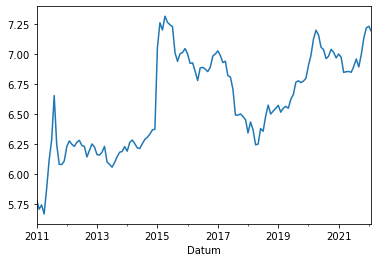

In [23]:
tečaj.loc[tečaj['Valuta'] == 'CHF', 'Srednji'].plot()

Možemo napraviti i grafove za svaku pojedinu valutu. `df.groupby(stupac)` daje parove `(vrijednost, podokvir)`, gdje `podokvir` ima ostale stupce iz `df` (različite od `stupac`), i one retke u kojima `stupac` ima vrijednost `vrijednost`.

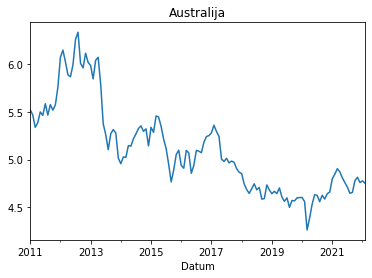

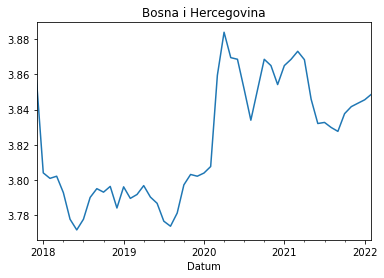

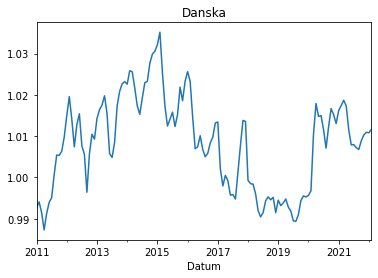

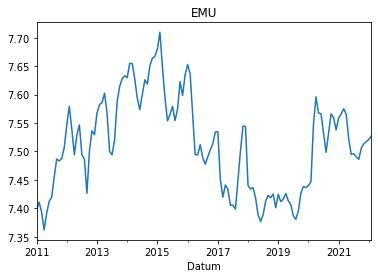

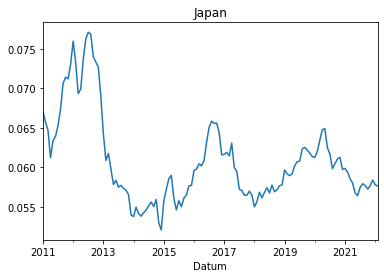

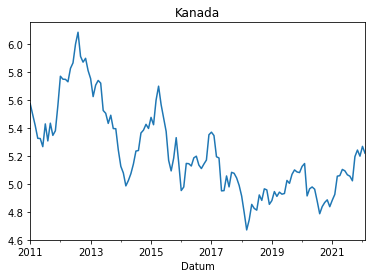

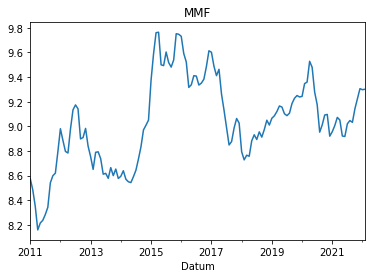

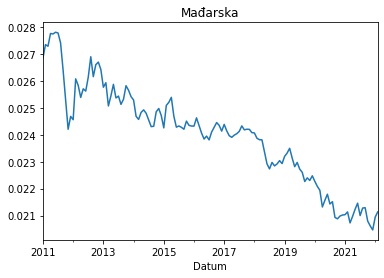

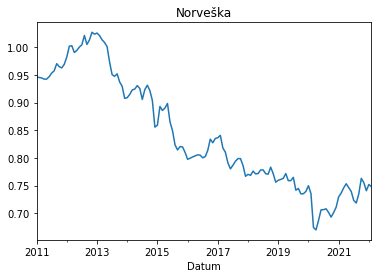

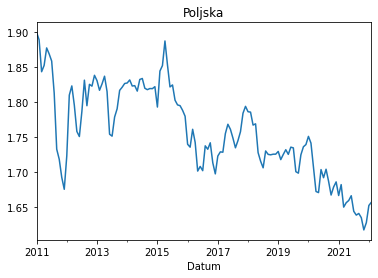

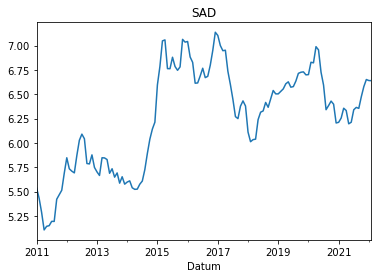

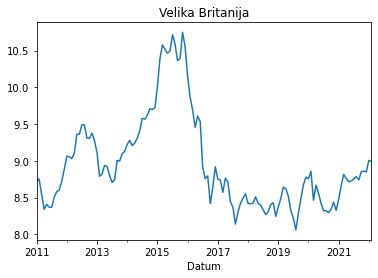

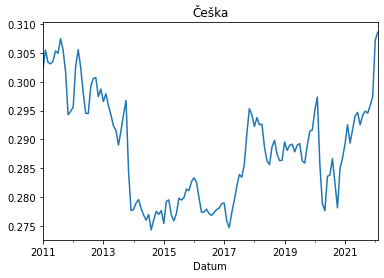

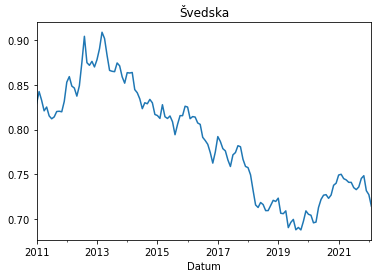

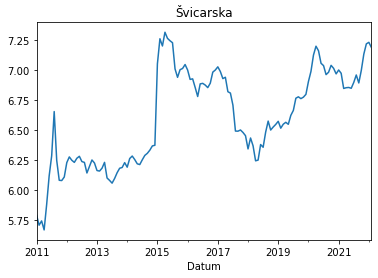

In [24]:
for država, podokvir in tečaj.groupby('Država'):
    podokvir.plot(title=država, legend=None)

### Odnos dviju stranih valuta

Da bismo pratili relativni tečaj dviju valuta od kojih nijedna nije kuna, potrebno je različite valute dobiti kao stupce (tada je njihov kvocijent relativni tečaj). Jednostavan način da se to učini je staviti valutu u indeks (maknut ćemo državu da nam ne smeta), i onda pozvati metodu `unstack`. Nažalost, neki retci su iz nekog razloga duplicirani (indeks ne inzistira na jedinstvenosti ključeva uvijek, samo kod nekih operacija -- a `unstack` je jedna od njih).

In [25]:
tečaj.set_index([tečaj.index, 'Valuta'], inplace=True)
del tečaj['Država']
tečaj = tečaj.loc[~tečaj.index.duplicated(), 'Srednji'].unstack('Valuta')
tečaj.head()

Valuta,AUD,BAM,CAD,CHF,CZK,DKK,EUR,GBP,HUF,JPY,NOK,PLN,SEK,USD,XDR
Datum,,,,,,,,,,,,,,,
2011-01-01,5.521513,NaN,5.571587,5.794304,0.302292,0.992650,7.396420,8.724773,0.026849,0.067089,0.945634,1.900072,0.829051,5.537878,8.575765
2011-02-01,5.469563,NaN,5.492327,5.710786,0.305517,0.994092,7.410873,8.753128,0.027346,0.065763,0.945485,1.889289,0.842513,5.431365,8.486219
2011-03-01,5.338322,NaN,5.415269,5.746383,0.303387,0.991520,7.393749,8.546276,0.027285,0.064709,0.944455,1.843635,0.832785,5.285354,8.351255
2011-04-01,5.386425,NaN,5.324651,5.671406,0.303116,0.987303,7.362212,8.340644,0.027759,0.061243,0.942367,1.852690,0.820994,5.105235,8.158269
2011-05-01,5.499733,NaN,5.323025,5.882541,0.303557,0.991288,7.391226,8.407499,0.027741,0.063371,0.942421,1.877661,0.825230,5.142271,8.214160


In [26]:
tečaj.columns

Index(['AUD', 'BAM', 'CAD', 'CHF', 'CZK', 'DKK', 'EUR', 'GBP', 'HUF', 'JPY',
       'NOK', 'PLN', 'SEK', 'USD', 'XDR'],
      dtype='object', name='Valuta')

Sada možemo grafički prikazati recimo kretanje tečaja €/\$.

<AxesSubplot:xlabel='Datum'>

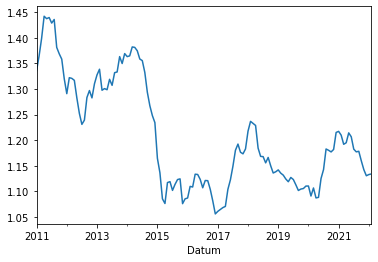

In [27]:
(tečaj['EUR'] / tečaj['USD']).plot()

## Vježba

Proučite malo podatke iz https://nyu.data-bootcamp.com/. Na njihovom Githubu (https://github.com/nyusterndatabootcamp/notebooks) ima zanimljivih stvari.

Ako vam nije dosta podataka o COVIDu, imate strojno čitljive podatke na https://www.koronavirus.hr/podaci/otvoreni-strojno-citljivi-podaci/526. Vježbajte s njima -- pokušajte producirati neku vizualizaciju koju nismo već vidjeli. :-)